In [1]:
import pandas as pd

# Load the Excel file
file_name = 'ASSESSMENT DATA Portfolio Analyst copy copy.xlsx'
df = pd.read_excel(file_name)


In [2]:
df_cleaned = df.dropna()
df_cleaned.head()

,refdate,Asset Name,Weight (%),Active Weight (%),Total Risk,%Contribution to Tracking Error,%Contribution to Total Risk,Beta (Relative to Benchmark),Country,GICS_sector,Price(USD),Market Capitalization (USD),Overall ESG Score,Overall ESG Environmental Score,Overall ESG Social Score,Overall ESG Governance Score
3,2022-11-02,ANTOFAGASTA PLC,0.024758,0.024758,39.970473,0.056347,0.025310,1.141519,GBR,Materials,11.76,1.328983e+10,8.3,3.6,6.1,7.7
4,2022-11-02,TAIWAN SEMICONDUCTOR MANUFACT CO LTD,0.074353,0.074353,34.137505,0.128432,0.072682,1.135673,USA,Information Technology,60.52,3.138613e+11,9.0,5.6,7.4,6.7
5,2022-11-02,INFOSYS LTD,0.036517,0.036517,32.361473,0.036108,0.030902,1.032912,USA,Information Technology,18.41,7.722322e+10,7.8,6.3,4.4,7.0
6,2022-11-02,GRUPO FINANCIERO BANORTE SAB DE CV,0.034936,0.031157,38.328379,0.068443,0.033954,1.082024,MEX,Financials,163.48,2.396724e+10,7.7,7.7,5.5,4.6
7,2022-11-02,HDFC BANK LTD,0.037633,0.037633,34.465135,0.014731,0.028051,0.956920,USA,Financials,61.41,1.141044e+11,7.4,0.8,6.3,5.8


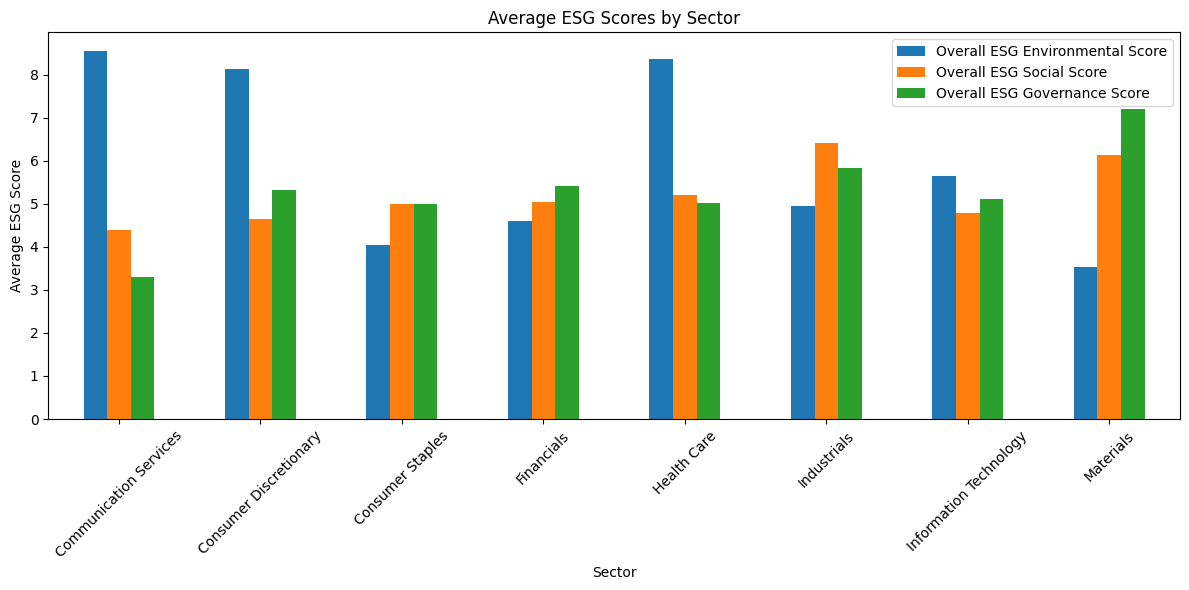

In [45]:
# Average ESG scores (Environmental, Social, Governance) by sector
sector_esg = df.groupby('GICS_sector')[['Overall ESG Environmental Score',
                                       'Overall ESG Social Score',
                                       'Overall ESG Governance Score']].mean()

sector_esg.plot(kind='bar', figsize=(12, 6))
plt.title('Average ESG Scores by Sector')
plt.xlabel('Sector')
plt.ylabel('Average ESG Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


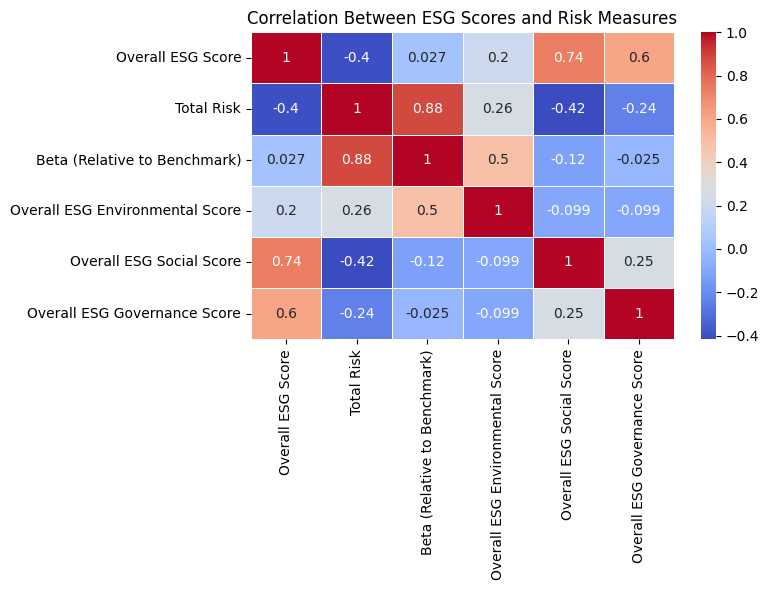

In [43]:
# Correlation matrix between ESG scores and risk measures
correlation_matrix = df[['Overall ESG Score', 'Total Risk', 'Beta (Relative to Benchmark)',
                         'Overall ESG Environmental Score', 'Overall ESG Social Score', 'Overall ESG Governance Score']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Between ESG Scores and Risk Measures')
plt.tight_layout()
plt.show()


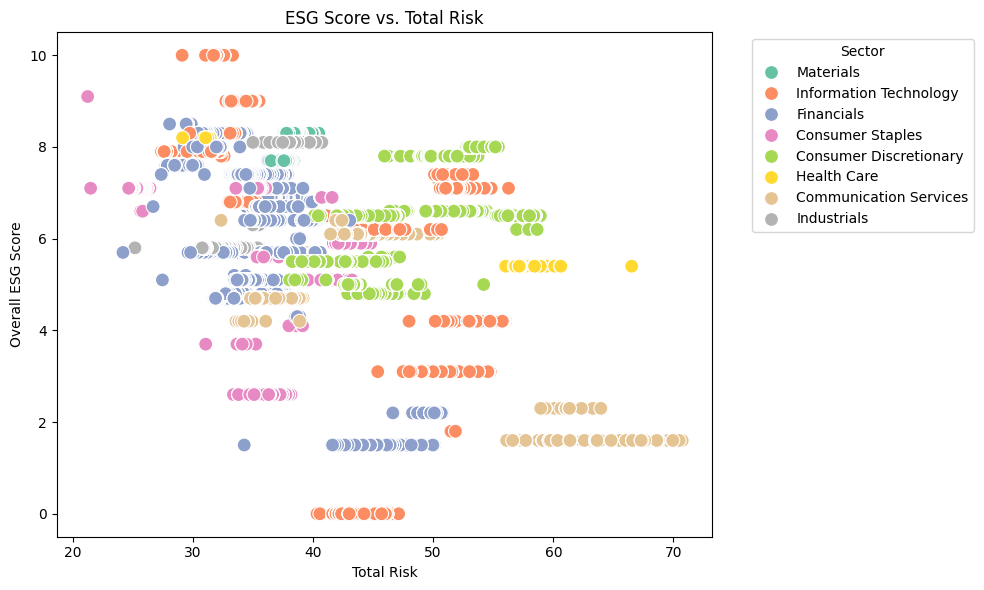

In [52]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Total Risk', y='Overall ESG Score', data=df, hue='GICS_sector', palette='Set2', s=100)
plt.title('ESG Score vs. Total Risk')
plt.xlabel('Total Risk')
plt.ylabel('Overall ESG Score')
plt.legend(title='Sector', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

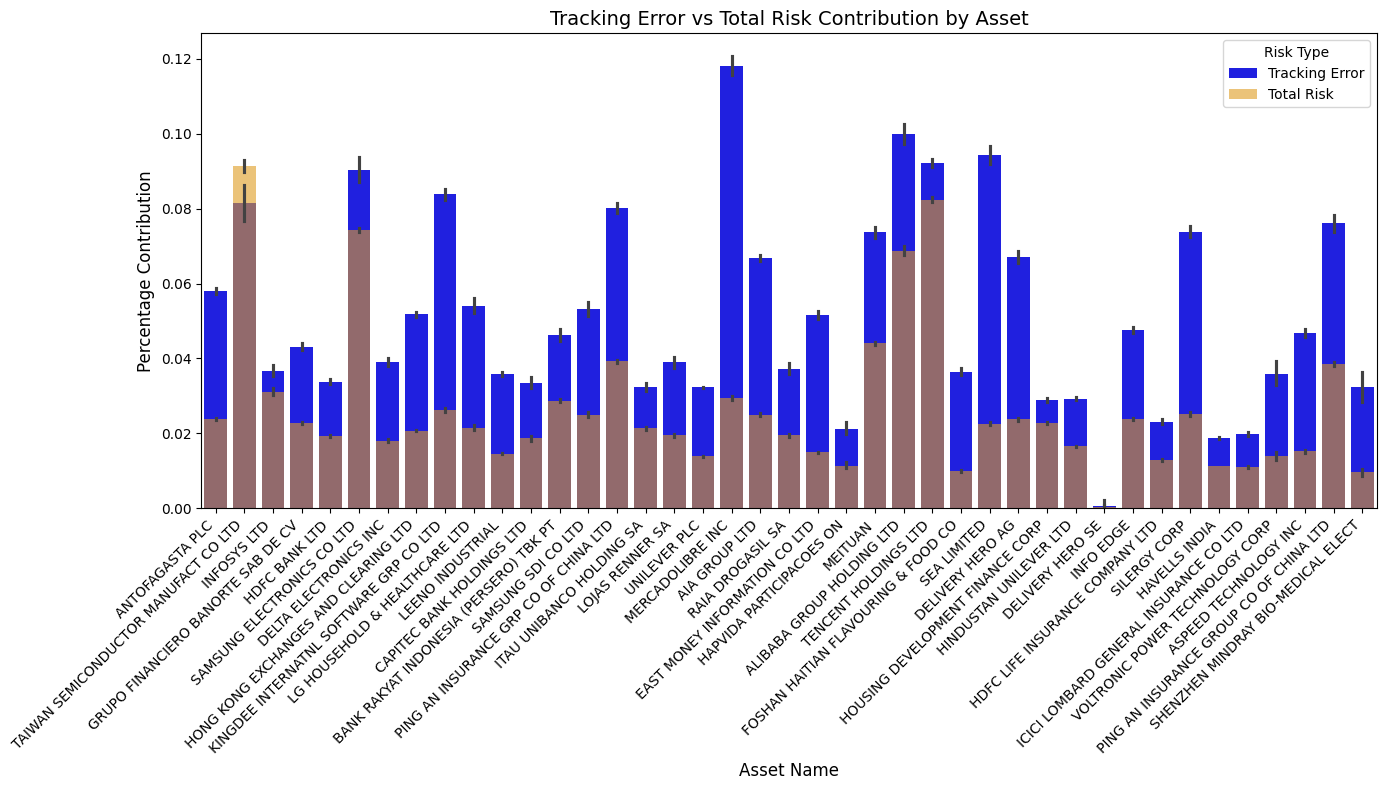

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting tracking error and total risk across assets
plt.figure(figsize=(14, 8))
sns.barplot(data=df_cleaned, x='Asset Name', y='%Contribution to Tracking Error', color='blue', label='Tracking Error')
sns.barplot(data=df_cleaned, x='Asset Name', y='%Contribution to Total Risk', color='orange', label='Total Risk', alpha=0.6)

# Add labels and title
plt.xlabel('Asset Name', fontsize=12)
plt.ylabel('Percentage Contribution', fontsize=12)
plt.title('Tracking Error vs Total Risk Contribution by Asset', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.legend(title="Risk Type")

plt.tight_layout()
plt.show()


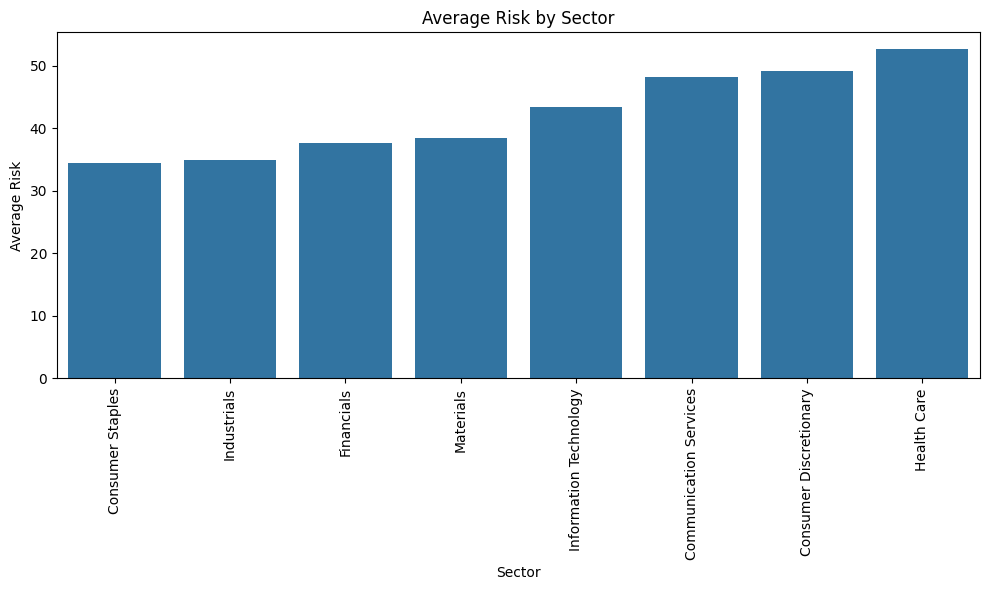

In [38]:
sector_risk = df.groupby('GICS_sector')['Total Risk'].mean().sort_values()

plt.figure(figsize=(10, 6))
sns.barplot(x=sector_risk.index, y=sector_risk.values)
plt.title('Average Risk by Sector')
plt.xlabel('Sector')
plt.ylabel('Average Risk')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


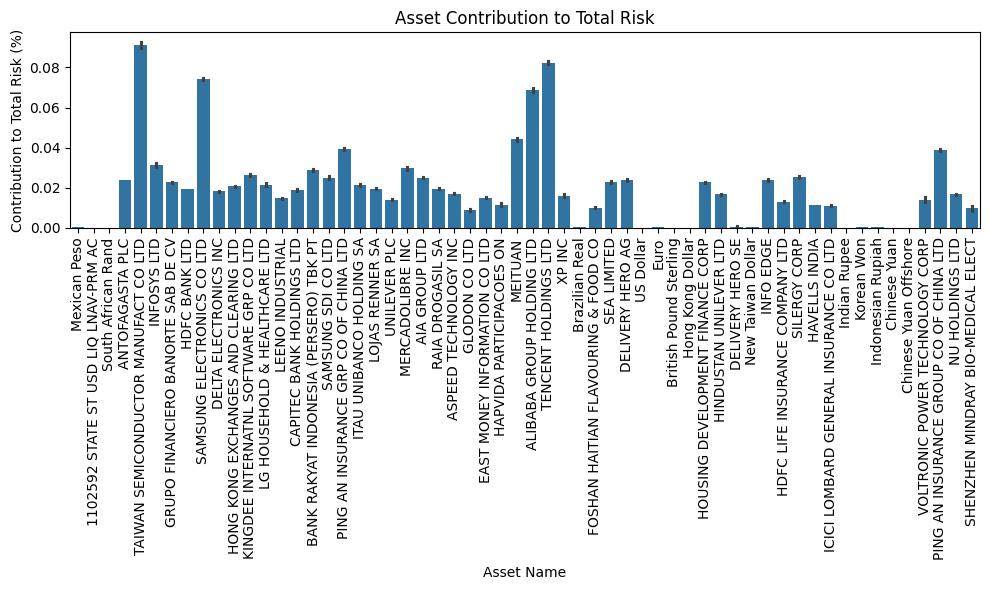

In [35]:

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x='Asset Name', y='%Contribution to Total Risk', data=df)
plt.xticks(rotation=90)
plt.title('Asset Contribution to Total Risk')
plt.xlabel('Asset Name')
plt.ylabel('Contribution to Total Risk (%)')
plt.tight_layout()
plt.show()




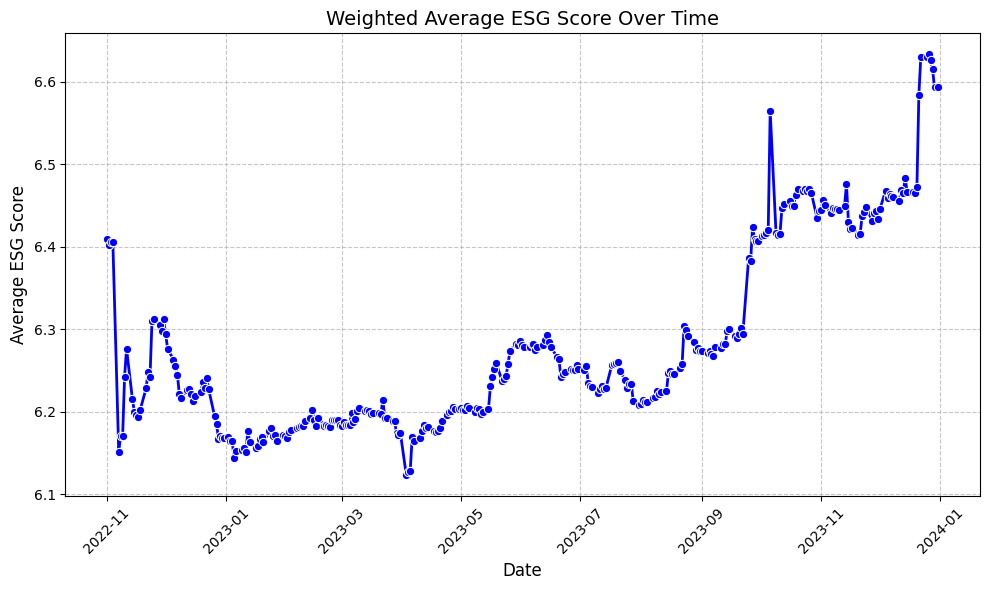

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Ensure df_cleaned is a copy of the original DataFrame
df_cleaned = df_cleaned.copy()

# Safely converting 'refdate' to datetime
df_cleaned.loc[:, 'refdate'] = pd.to_datetime(df_cleaned['refdate'])

# Safely creating the 'Weighted_ESG_Score' column
df_cleaned.loc[:, 'Weighted_ESG_Score'] = df_cleaned['Weight (%)'] * df_cleaned['Overall ESG Score']


# 2. Portfolio-Level Aggregates
portfolio_summary = df_cleaned.groupby('refdate').agg({
    'Weight (%)': 'sum',
    '%Contribution to Tracking Error': 'sum',
    '%Contribution to Total Risk': 'sum',
    'Weighted_ESG_Score': 'sum'
}).reset_index()

# Calculate Average ESG Score
portfolio_summary['Average_ESG_Score'] = (
    portfolio_summary['Weighted_ESG_Score'] / portfolio_summary['Weight (%)']
)

# 3. ESG Trends Visualization
plt.figure(figsize=(10, 6))

# Use sns.lineplot for visualization
sns.lineplot(
    data=portfolio_summary,
    x='refdate',
    y='Average_ESG_Score',
    marker='o',  # Correct marker styling
    color='blue',  # Define a consistent line color
    linewidth=2  # Customize line width for clarity
)

plt.title("Weighted Average ESG Score Over Time", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Average ESG Score", fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(visible=True, linestyle='--', alpha=0.7)
plt.tight_layout()  # Adjust layout to fit all elements
plt.savefig("weighted_esg_trend.png")
plt.show()


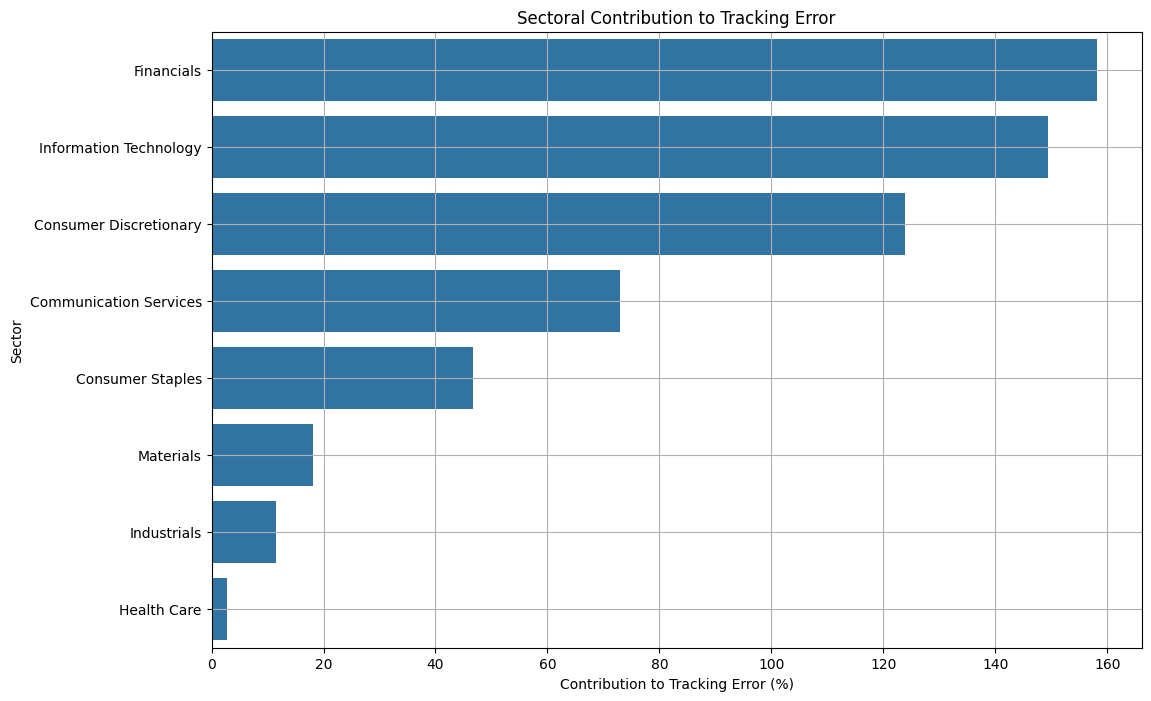

In [5]:
sector_risk = df_cleaned.groupby('GICS_sector').agg({
    '%Contribution to Tracking Error': 'sum',
    '%Contribution to Total Risk': 'sum'
}).reset_index()
sector_risk = sector_risk.sort_values('%Contribution to Tracking Error', ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(data=sector_risk, x='%Contribution to Tracking Error', y='GICS_sector')
plt.title("Sectoral Contribution to Tracking Error")
plt.xlabel("Contribution to Tracking Error (%)")
plt.ylabel("Sector")
plt.grid()
plt.savefig("sector_tracking_error.png")
plt.show()

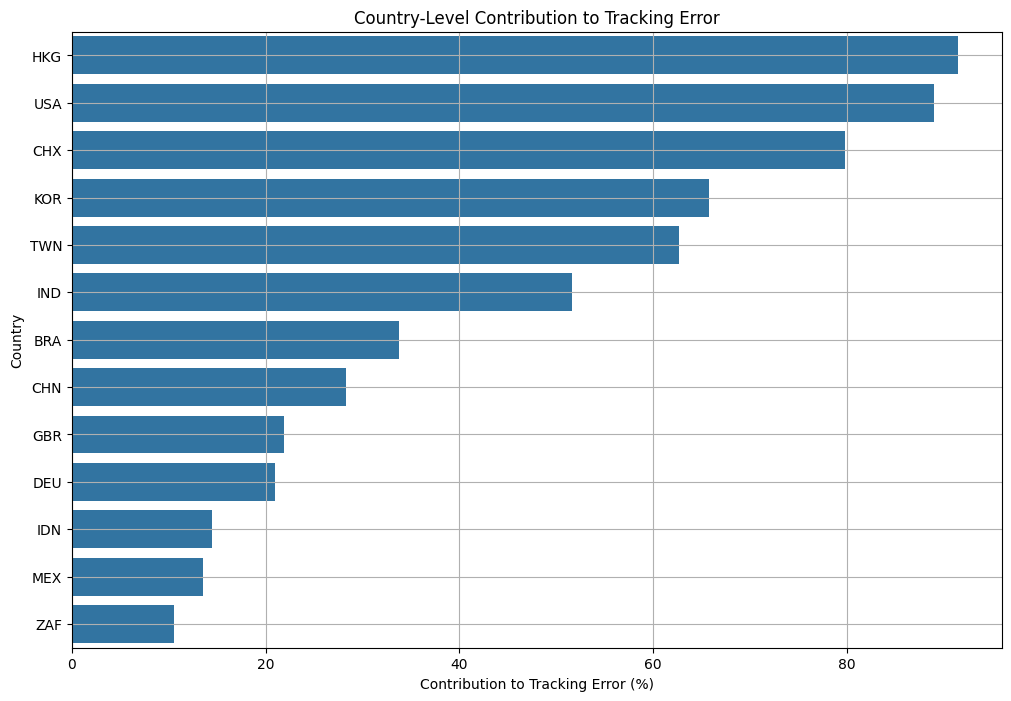

In [6]:
country_risk = df_cleaned.groupby('Country').agg({
    '%Contribution to Tracking Error': 'sum',
    '%Contribution to Total Risk': 'sum'
}).reset_index()

# Sort by tracking error contribution
country_risk = country_risk.sort_values('%Contribution to Tracking Error', ascending=False)

# Visualization: Country-level contribution to tracking error
plt.figure(figsize=(12, 8))
sns.barplot(data=country_risk, x='%Contribution to Tracking Error', y='Country')
plt.title("Country-Level Contribution to Tracking Error")
plt.xlabel("Contribution to Tracking Error (%)")
plt.ylabel("Country")
plt.grid()
plt.savefig("country_tracking_error.png")
plt.show()

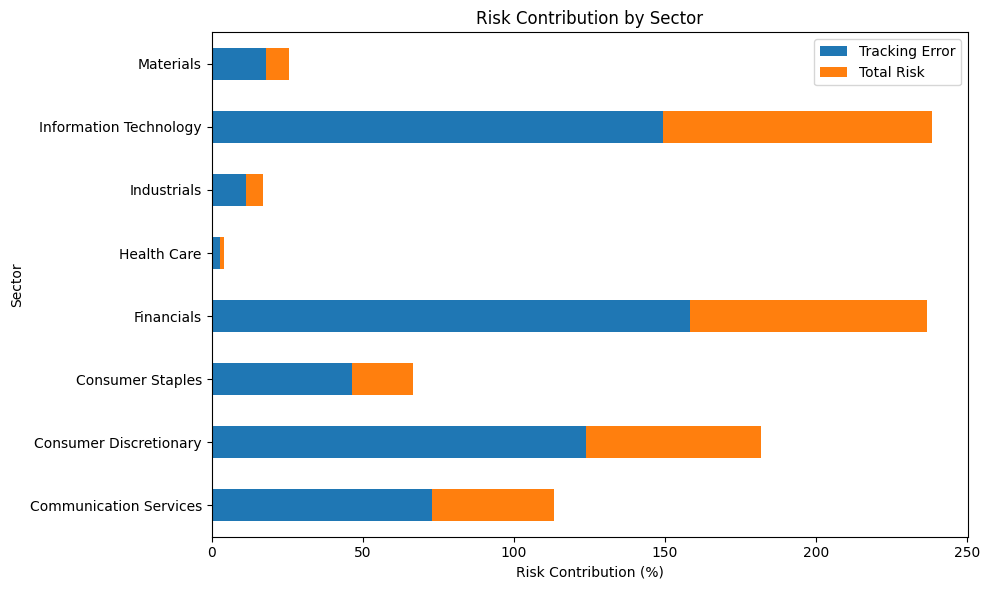

In [7]:
sector_risk = df_cleaned.groupby('GICS_sector').agg({
    '%Contribution to Tracking Error': 'sum',
    '%Contribution to Total Risk': 'sum'
}).reset_index()

# Stacked bar plot
sector_risk.plot(
    x='GICS_sector',
    kind='barh',
    stacked=True,
    figsize=(10, 6),
    color=['#1f77b4', '#ff7f0e']
)
plt.title('Risk Contribution by Sector')
plt.xlabel('Risk Contribution (%)')
plt.ylabel('Sector')
plt.legend(['Tracking Error', 'Total Risk'])
plt.tight_layout()
plt.savefig('sector_risk_contribution.png')
plt.show()


In [8]:
!pip install -U kaleido

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.9 MB/s eta 0:00:00


In [9]:

import plotly.express as px

country_risk = df_cleaned.groupby('Country').agg({
    '%Contribution to Tracking Error': 'sum',
    '%Contribution to Total Risk': 'sum'
}).reset_index()

fig = px.choropleth(
    country_risk,
    locations='Country',
    locationmode='ISO-3',
    color='%Contribution to Total Risk',
    title='Geographical Risk Contribution',
    color_continuous_scale='Blues'
)
fig.write_html('geographical_risk_contribution.html')
fig.show()


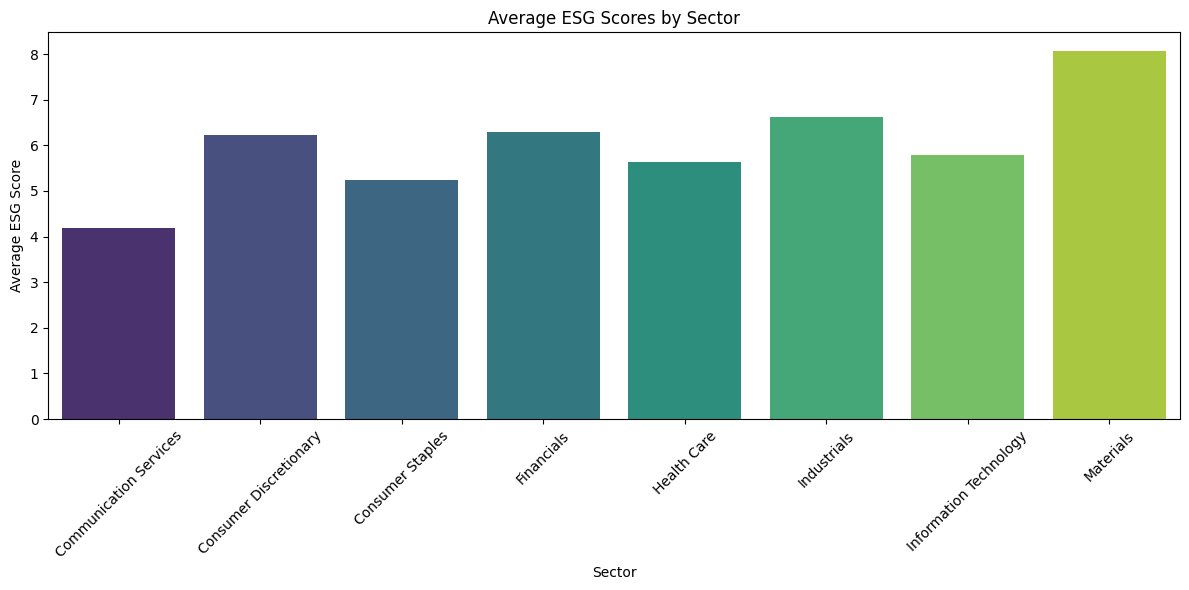

In [10]:
plt.figure(figsize=(12, 6))
sector_avg_esg = df_cleaned.groupby('GICS_sector')['Overall ESG Score'].mean().reset_index()
sns.barplot(data=sector_avg_esg, x='GICS_sector', y='Overall ESG Score', hue='GICS_sector', palette='viridis', legend=False)
plt.title('Average ESG Scores by Sector')
plt.xticks(rotation=45)
plt.xlabel('Sector')
plt.ylabel('Average ESG Score')
plt.tight_layout()
plt.savefig('average_esg_scores_by_sector.png')
plt.show()


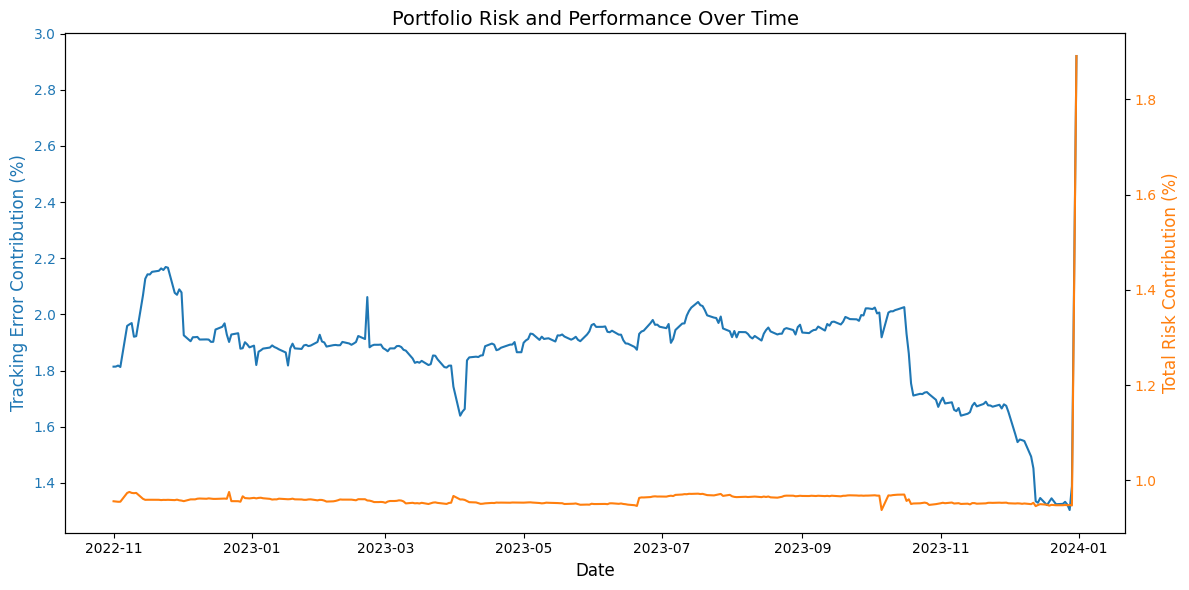

In [13]:
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.set_title('Portfolio Risk and Performance Over Time', fontsize=14)
ax1.set_xlabel('Date', fontsize=12)
ax1.set_ylabel('Tracking Error Contribution (%)', color='tab:blue', fontsize=12)
ax1.plot(portfolio_summary['refdate'], portfolio_summary['%Contribution to Tracking Error'], color='tab:blue', label='Tracking Error')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
ax2.set_ylabel('Total Risk Contribution (%)', color='tab:orange', fontsize=12)
ax2.plot(portfolio_summary['refdate'], portfolio_summary['%Contribution to Total Risk'], color='tab:orange', label='Total Risk')
ax2.tick_params(axis='y', labelcolor='tab:orange')

fig.tight_layout()
plt.savefig('portfolio_risk_performance.png')
plt.show()


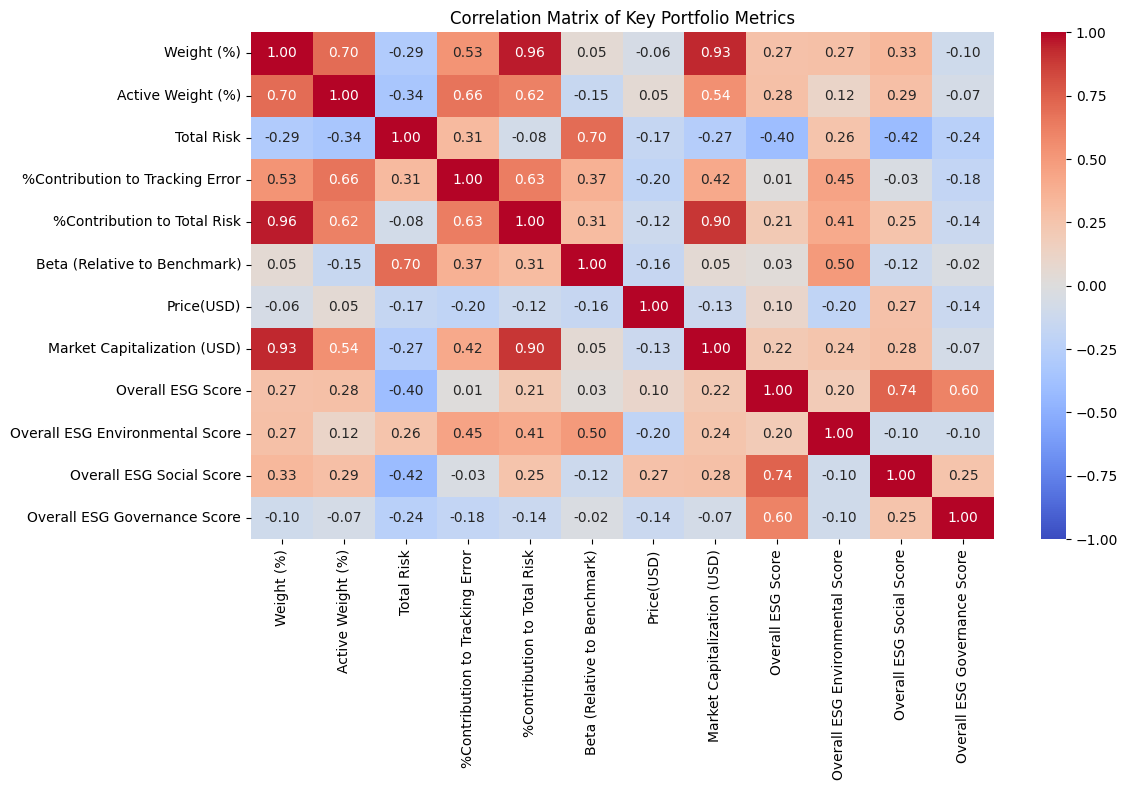

In [18]:
corr_matrix = df_cleaned[['Weight (%)', 'Active Weight (%)', 'Total Risk', '%Contribution to Tracking Error',
                          '%Contribution to Total Risk', 'Beta (Relative to Benchmark)', 'Price(USD)',
                          'Market Capitalization (USD)', 'Overall ESG Score', 'Overall ESG Environmental Score',
                          'Overall ESG Social Score', 'Overall ESG Governance Score']].corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f')
plt.title('Correlation Matrix of Key Portfolio Metrics')
plt.tight_layout()
plt.show()

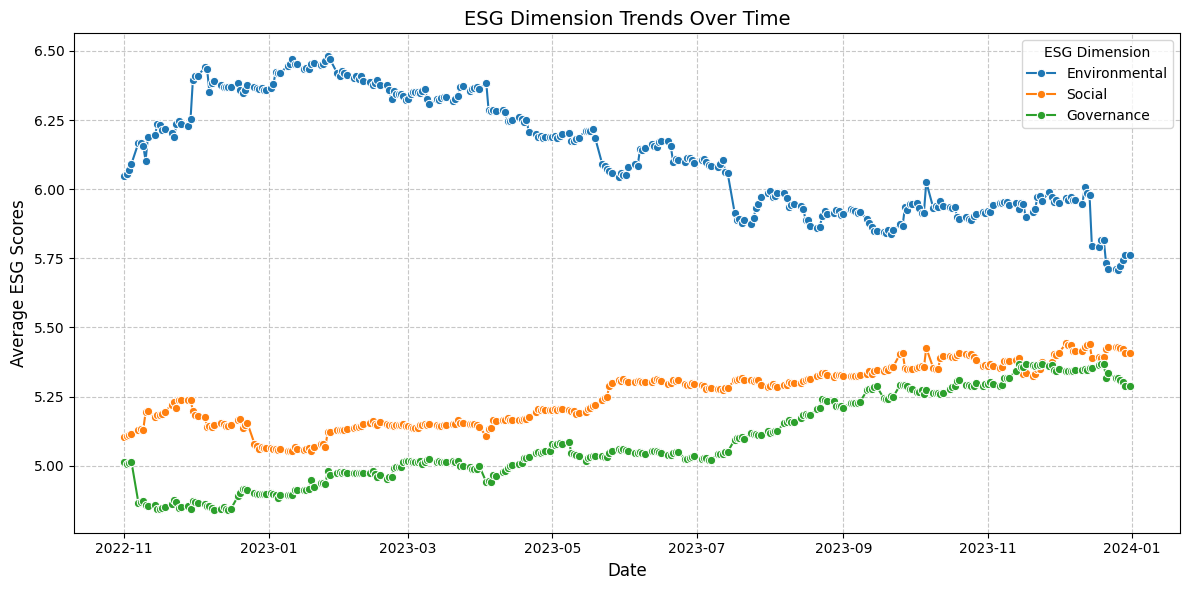

In [15]:
# Calculate weighted ESG dimension scores
df_cleaned['Weighted_ESG_Environmental'] = df_cleaned['Weight (%)'] * df_cleaned['Overall ESG Environmental Score']
df_cleaned['Weighted_ESG_Social'] = df_cleaned['Weight (%)'] * df_cleaned['Overall ESG Social Score']
df_cleaned['Weighted_ESG_Governance'] = df_cleaned['Weight (%)'] * df_cleaned['Overall ESG Governance Score']

# Aggregate at the portfolio level
portfolio_summary = df_cleaned.groupby('refdate').agg({
    'Weight (%)': 'sum',
    'Weighted_ESG_Environmental': 'sum',
    'Weighted_ESG_Social': 'sum',
    'Weighted_ESG_Governance': 'sum'
}).reset_index()

# Calculate averages for each ESG dimension
portfolio_summary['Average_ESG_Environmental'] = (
    portfolio_summary['Weighted_ESG_Environmental'] / portfolio_summary['Weight (%)']
)
portfolio_summary['Average_ESG_Social'] = (
    portfolio_summary['Weighted_ESG_Social'] / portfolio_summary['Weight (%)']
)
portfolio_summary['Average_ESG_Governance'] = (
    portfolio_summary['Weighted_ESG_Governance'] / portfolio_summary['Weight (%)']
)

# Plot ESG dimension trends
plt.figure(figsize=(12, 6))
sns.lineplot(data=portfolio_summary, x='refdate', y='Average_ESG_Environmental', label='Environmental', marker='o')
sns.lineplot(data=portfolio_summary, x='refdate', y='Average_ESG_Social', label='Social', marker='o')
sns.lineplot(data=portfolio_summary, x='refdate', y='Average_ESG_Governance', label='Governance', marker='o')

# Customize plot
plt.title('ESG Dimension Trends Over Time', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Average ESG Scores', fontsize=12)
plt.legend(title='ESG Dimension')
plt.grid(visible=True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('esg_dimension_trends.png')
plt.show()


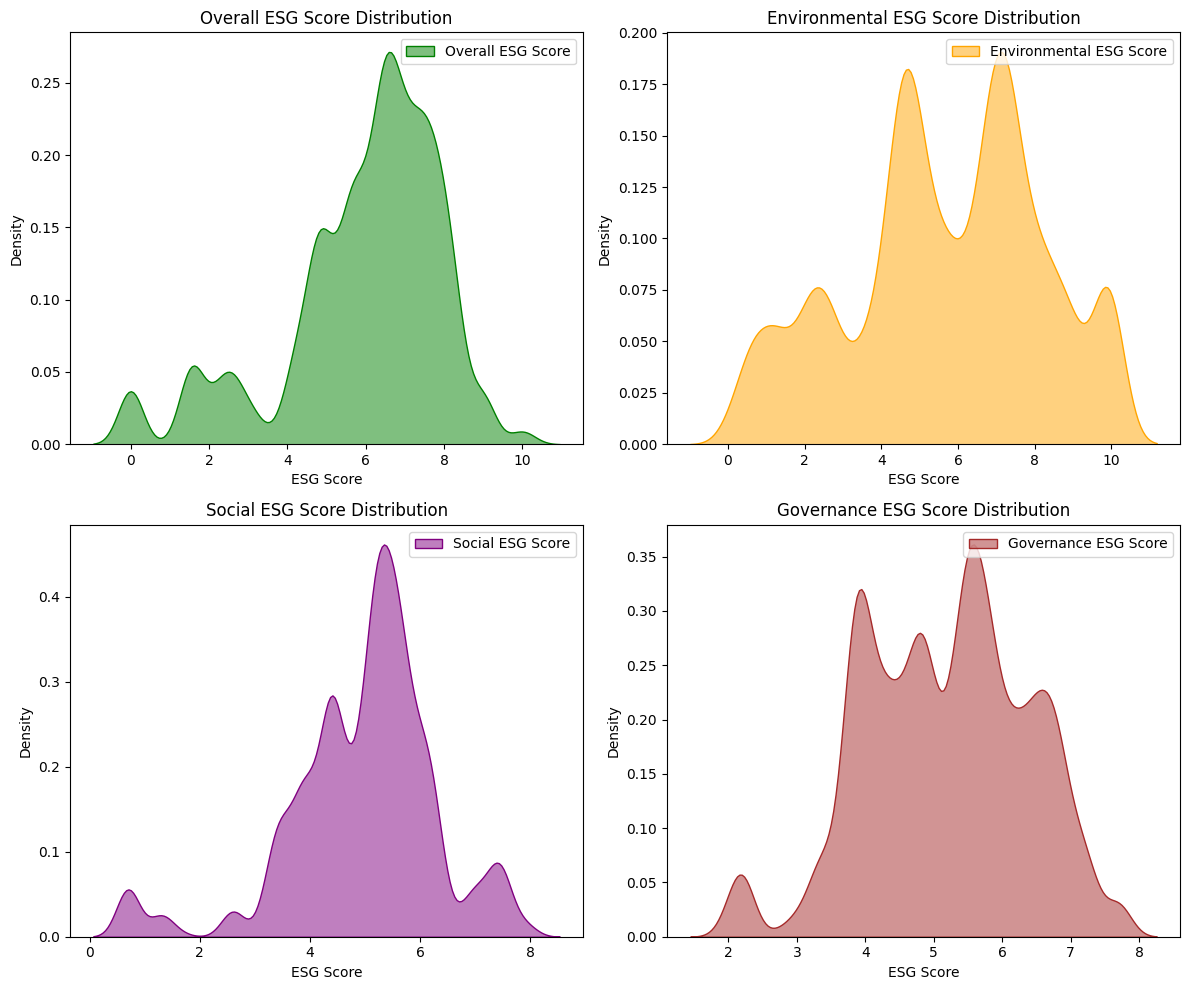

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot each ESG score as a KDE plot in separate subplots
sns.kdeplot(df_cleaned['Overall ESG Score'], ax=axes[0, 0], color='green', fill=True, alpha=0.5, label='Overall ESG Score')
sns.kdeplot(df_cleaned['Overall ESG Environmental Score'], ax=axes[0, 1], color='orange', fill=True, alpha=0.5, label='Environmental ESG Score')
sns.kdeplot(df_cleaned['Overall ESG Social Score'], ax=axes[1, 0], color='purple', fill=True, alpha=0.5, label='Social ESG Score')
sns.kdeplot(df_cleaned['Overall ESG Governance Score'], ax=axes[1, 1], color='brown', fill=True, alpha=0.5, label='Governance ESG Score')

# Add labels and titles to each subplot
axes[0, 0].set_title('Overall ESG Score Distribution')
axes[0, 1].set_title('Environmental ESG Score Distribution')
axes[1, 0].set_title('Social ESG Score Distribution')
axes[1, 1].set_title('Governance ESG Score Distribution')

# Set common labels
for ax in axes.flat:
    ax.set_xlabel('ESG Score')
    ax.set_ylabel('Density')
    ax.legend()

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


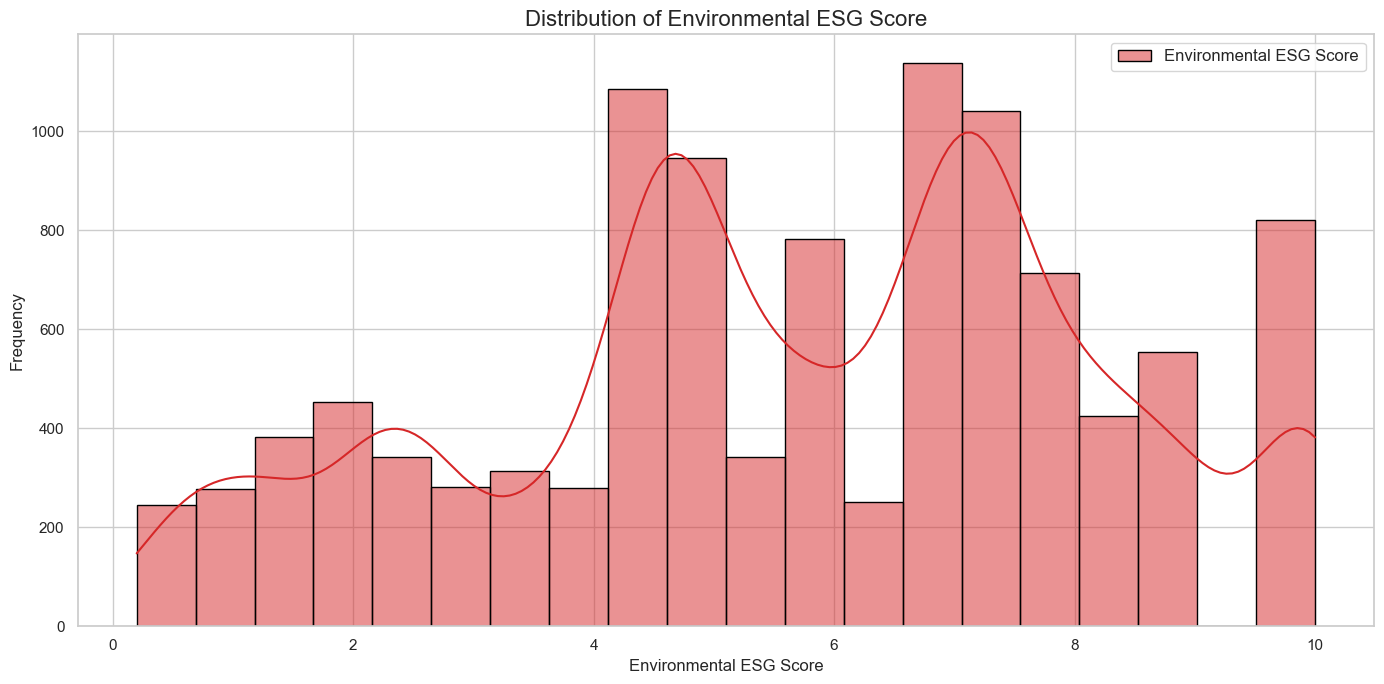

In [ ]:
plt.figure(figsize=(14, 7))
sns.histplot(df_cleaned['Overall ESG Environmental Score'], kde=True, color='#d62728', bins=20, label='Environmental ESG Score', edgecolor='black')
plt.title('Distribution of Environmental ESG Score', fontsize=16)
plt.xlabel('Environmental ESG Score', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(loc='upper right', fontsize=12)
plt.tight_layout()
plt.show()


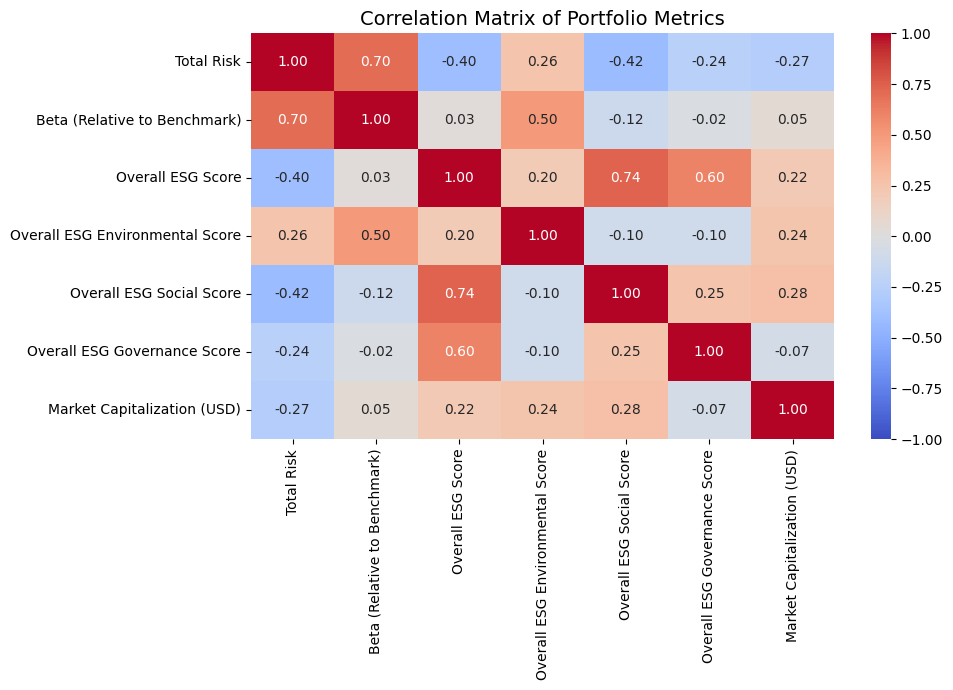

In [32]:
# Calculate the correlation matrix
correlation_matrix = df_cleaned[['Total Risk', 'Beta (Relative to Benchmark)', 'Overall ESG Score',
                                 'Overall ESG Environmental Score', 'Overall ESG Social Score',
                                 'Overall ESG Governance Score', 'Market Capitalization (USD)']].corr()

# Plot heatmap for correlation analysis
plt.figure(figsize=(10, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Portfolio Metrics', fontsize=14)
plt.tight_layout()
plt.show()


<ipython-input-27-5a67bc5483d5>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




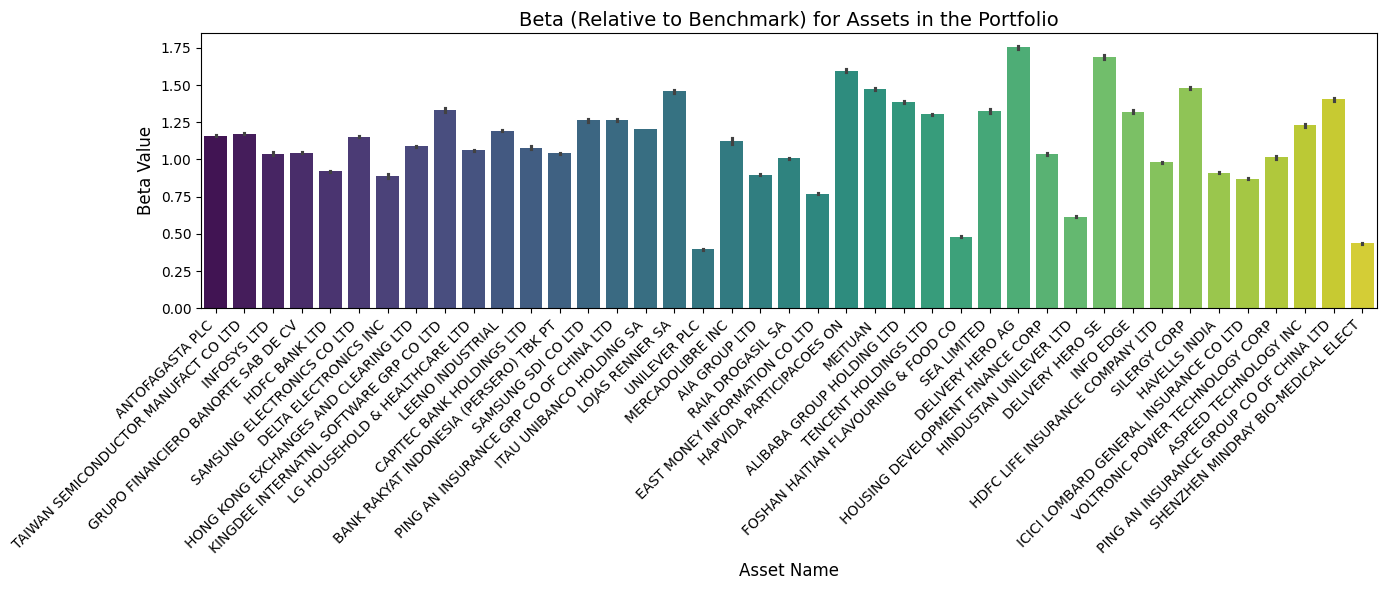

In [27]:
# Plotting the beta values of assets relative to the benchmark
plt.figure(figsize=(14, 6))

sns.barplot(data=df_cleaned, x='Asset Name', y='Beta (Relative to Benchmark)', palette='viridis')

# Add labels and title
plt.xlabel('Asset Name', fontsize=12)
plt.ylabel('Beta Value', fontsize=12)
plt.title('Beta (Relative to Benchmark) for Assets in the Portfolio', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [53]:
pip install fpdf matplotlib seaborn


  Preparing metadata (setup.py) ... done
  Created wheel for fpdf: filename=fpdf-1.7.2-py2.py3-none-any.whl size=40704 sha256=4f5beb57b3e77143dd27d5f5601a04c424650676884558b974739b73e3f1e184
  Stored in directory: /root/.cache/pip/wheels/f9/95/ba/f418094659025eb9611f17cbcaf2334236bf39a0c3453ea455
Successfully built fpdf


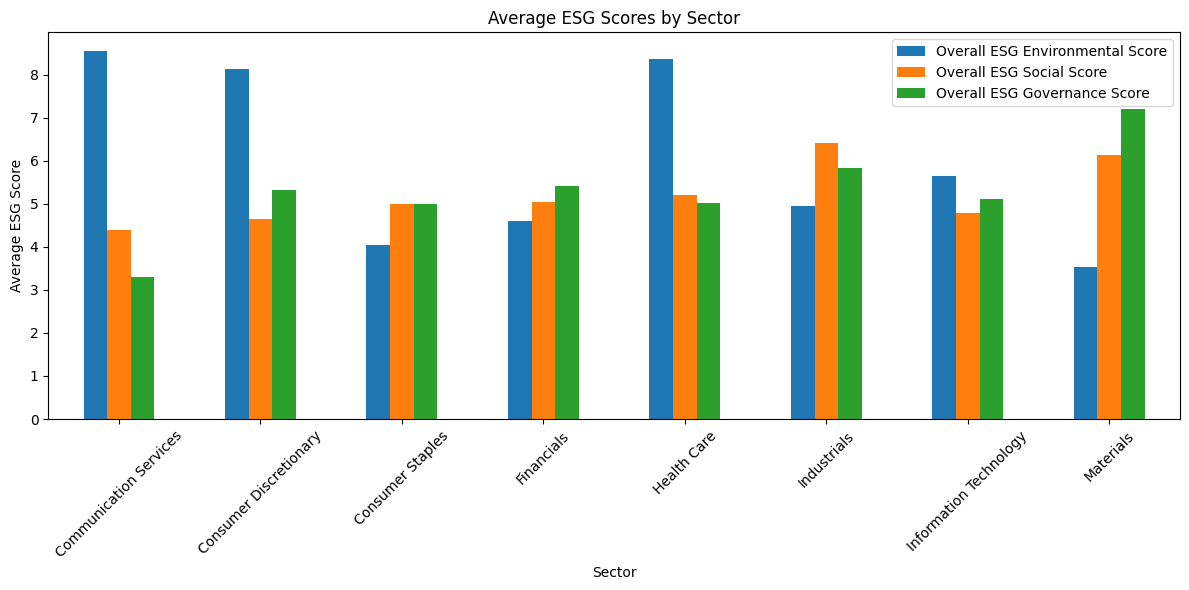

''

In [55]:
from fpdf import FPDF

# Initialize the PDF document
pdf = FPDF()
pdf.set_auto_page_break(auto=True, margin=15)
pdf.add_page()

# Title
pdf.set_font("Arial", 'B', 16)
pdf.cell(200, 10, txt="Portfolio Risk, Performance, and ESG Trends", ln=True, align='C')

# Introduction
pdf.set_font("Arial", size=12)
pdf.ln(10)  # Line break
pdf.multi_cell(0, 10, txt="In this report, we analyze the time series data of an equity portfolio to identify the key drivers of portfolio risk, performance, and ESG trends. "
                          "The analysis includes visualizations of ESG scores by sector, risk contributions from assets and sectors, and correlations between ESG factors and portfolio risk measures.")

# Add first plot (example)
pdf.ln(10)
pdf.cell(200, 10, txt="Figure 1: Example Plot", ln=True)
pdf.image("plot1.png", x=20, w=170)  # Include the saved plot

# Add other sections and plots similarly
pdf.ln(10)
pdf.cell(200, 10, txt="Figure 2: Another Plot", ln=True)
pdf.image("plot2.png", x=20, w=170)  # Replace with actual plot filename

# Save the PDF to a file
pdf.output("portfolio_analysis_report.pdf")
